Text(0, 0.5, 'impurity index')

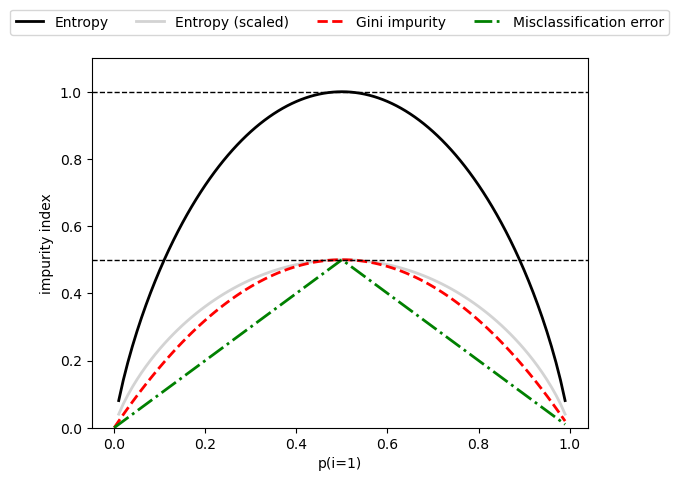

In [2]:
# Decision Tree

# activation
# ----------
# IG(Dp, f) = I(Dp) - sum( (Nj / Np) * I(Dj))
# IG(Dp, f) = I(Dp) - (Nleft / Np).dot(I(Dleft)) - (Nright / Np).dot(I(Dright)) for binary classification.
# where : 
# I = impurity criterion
# D = node, Dj for child nodes and Dp for parent node
# N = samples, Nj for child samples and Np for parent samples, 
#     Nleft and Nright represent left or right child node's samples(binary situation) 

# Impurity criterion
# ------------------
# 1. Gini Impurity 
# 2. Entropy
# 3. Misclassification Error

# visualize different impurity criterion
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return 1 - (p**2 + (1 - p)**2)
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1-p))
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
gin = gini(x)

fig = plt.figure()
ax = plt.subplot(111)
for item, label, linestyle, color, in zip([ent, sc_ent, gin, err], 
                                          ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'], 
                                          ['-', '-', '--', '-.'], 
                                          ['black', 'lightgrey', 'red', 'green', 'cyan']):
    line = ax.plot(x, item, label=label, linestyle=linestyle, lw=2, color=color)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

In [3]:
# 1. prepare datasets
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# load iris datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# scalar datasets
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# combined datasets
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [4]:
# 2. imply decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

C:\Users\12923\AppData\Local\Temp\ipykernel_26308\832126107.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


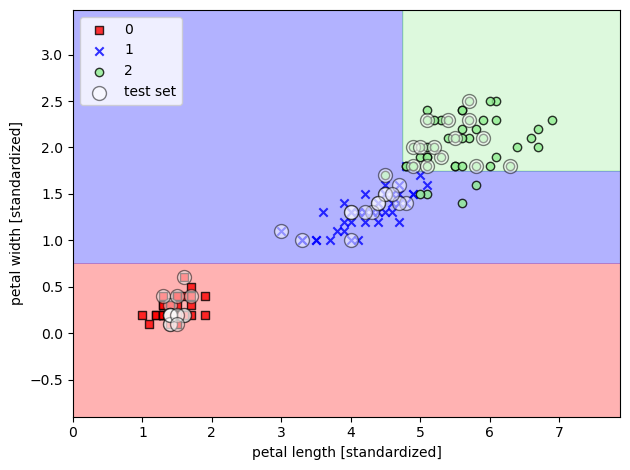

In [5]:
# 3. visualize prediction
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolutions=0.02):
    """Visualize decision regions usinng matplotlib colormap
    
    Parameters
    ----------
    X: array-like vector, shape = [n_examples, n_features]
        Training vectors, also called input.
    y: array-like vector, shape = [n_examples]
        Target values.
    classifier: python object, mainly class
        binary machine learning classifier
    resolutions: float
        visualization map resolutions

    """

    # marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # show class examples
    for idx, col in enumerate(np.unique(y)):
        plt.scatter(x=X[y == col, 0],
                    y=X[y == col, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=col,
                    edgecolors='black')
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1], 
                    c='white',
                    edgecolor='black', 
                    alpha=0.5,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

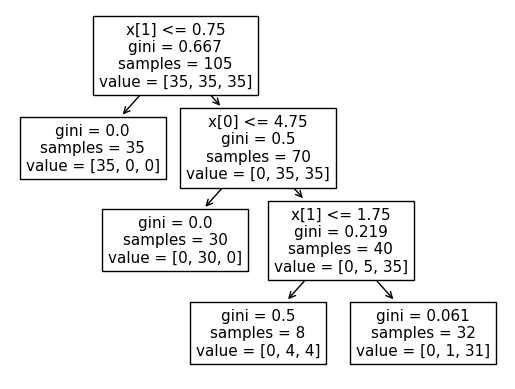

True

In [6]:
# 4. visualize decision tree

# using sklearn.tree visualizer
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

# using pydotplus for better visual presentation
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, 
                           filled=True, 
                           rounded=True, 
                           class_names=['Setosa', 
                                        'Versicolor', 
                                        'Virginica'], 
                           feature_names=['petal length', 
                                           'petal width'], 
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree for iris data 2.png')

C:\Users\12923\AppData\Local\Temp\ipykernel_26308\832126107.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


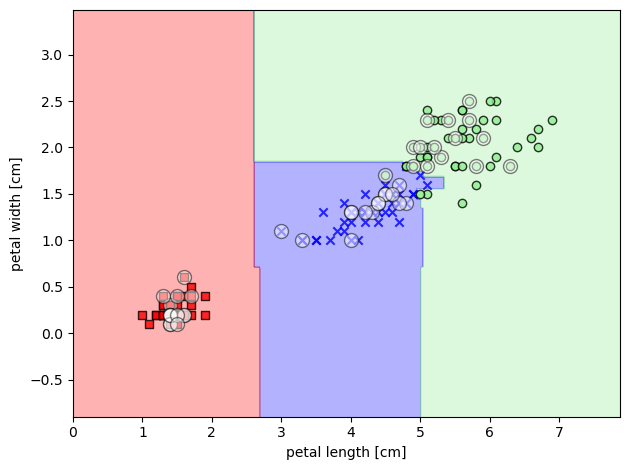

In [7]:
# 5. Random Forest(ensemble learning)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25, 
                                random_state=1, 
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.tight_layout()
plt.show()

C:\Users\12923\AppData\Local\Temp\ipykernel_26308\832126107.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


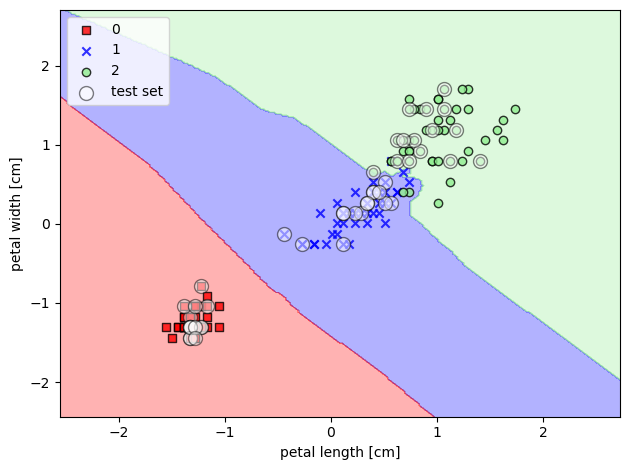

In [10]:
# 6. K-Neighbors

# In Euclidean Metric situation, we need to unify or 
# standardize datasets to better fit the model
X_combined_std = np.vstack((X_train_std, X_test_std))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()